<a href="https://colab.research.google.com/github/AlexKalll/Supervised-ML-Models/blob/main/MNIST_Dataset_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.9082 - loss: 0.2947 - val_accuracy: 0.9850 - val_loss: 0.0485
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 91s 48ms/step - accuracy: 0.9862 - loss: 0.0455 - val_accuracy: 0.9878 - val_loss: 0.0400
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.9916 - loss: 0.0280 - val_accuracy: 0.9910 - val_loss: 0.0360
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9941 - loss: 0.0191 - val_accuracy: 0.9903 - val_loss: 0.0334
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 76s 45ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9907 - val_loss: 0.0372
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9915 - val_loss: 0.0311
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9913 - val_loss: 0.0399
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9973 -

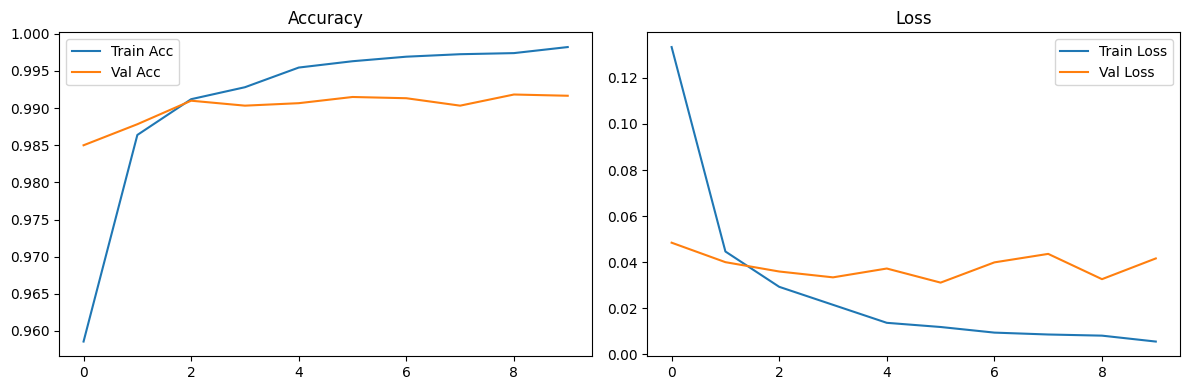

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


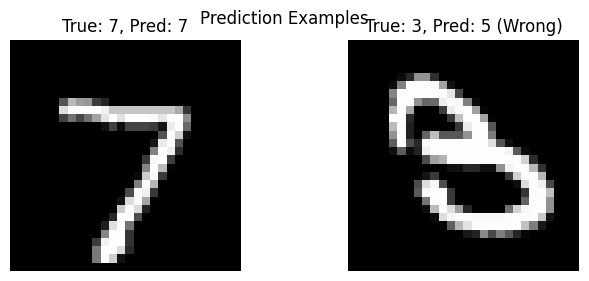

Final Test Accuracy: 0.9901


In [ ]:
# ASSIGNMENT 2: MNIST CNN TRAINING
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# Plot curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prediction Example
pred = model.predict(x_test)
pred_labels = np.argmax(pred, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Find one correct & one wrong
correct_idx = np.where(pred_labels == true_labels)[0][0]
wrong_idx = np.where(pred_labels != true_labels)[0][0]

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.imshow(x_test[correct_idx].squeeze(), cmap='gray')
plt.title(f"True: {true_labels[correct_idx]}, Pred: {pred_labels[correct_idx]}")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(x_test[wrong_idx].squeeze(), cmap='gray')
plt.title(f"True: {true_labels[wrong_idx]}, Pred: {pred_labels[wrong_idx]} (Wrong)")
plt.axis('off')

plt.suptitle("Prediction Examples")
plt.show()

# Print test accuracy again for clarity
print(f"Final Test Accuracy: {test_acc:.4f}")

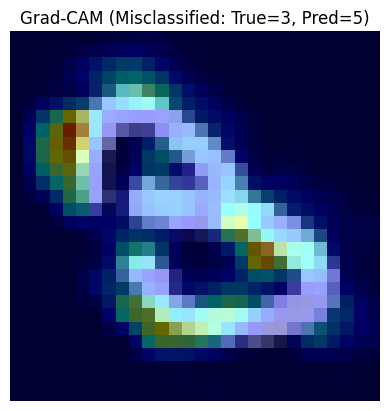

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def get_gradcam(model, img_tensor, layer_name='conv2d_1'):
    # Ensure model is built.
    if not model.built:
        model.build(input_shape=(None, 28, 28, 1))

    # Define a new Input tensor that matches the model's expected input shape
    input_tensor_grad = tf.keras.Input(shape=model.input_shape[1:])

    # Traverse the model's layers to get the output of the target layer and the final output
    x = input_tensor_grad
    conv_layer_output = None
    for layer in model.layers:
        x = layer(x)
        if layer.name == layer_name:
            conv_layer_output = x

    if conv_layer_output is None:
        raise ValueError(f"Layer '{layer_name}' not found in the model.")

    final_output = x # x at this point is the output of the last layer

    # Create the grad_model using the new input tensor and the derived outputs
    grad_model = tf.keras.models.Model(
        inputs=[input_tensor_grad],
        outputs=[conv_layer_output, final_output]
    )

    with tf.GradientTape() as tape:
        # Cast the image to tf.float32 as expected by the model
        img_tensor = tf.cast(img_tensor, tf.float32)
        # Watch the input tensor to compute gradients with respect to it
        tape.watch(img_tensor)

        # Get the feature maps and predictions using the grad_model
        conv_outputs, predictions = grad_model(img_tensor)

        # Get the predicted class for the input image
        class_idx = tf.argmax(predictions[0])
        # Get the loss for the predicted class
        loss = predictions[:, class_idx]

    # Compute gradients of the loss with respect to the feature maps
    grads = tape.gradient(loss, conv_outputs)

    # Average the gradients over spatial dimensions
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map by the corresponding average gradient
    conv_outputs = conv_outputs[0] # remove batch dimension
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize the heatmap to [0, 1]
    heatmap = tf.maximum(heatmap, 0) / (tf.math.reduce_max(heatmap) + 1e-10) # Add epsilon to avoid division by zero
    heatmap = heatmap.numpy()

    # Resize heatmap to original image size
    heatmap = cv2.resize(heatmap, (28, 28))
    heatmap = np.uint8(255 * heatmap) # Convert to 0-255 range
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET) # Apply colormap

    # Superimpose heatmap on original image
    # Original image needs to be converted to 3 channels (BGR) for superimposition
    original_img_255 = (x_test[wrong_idx].squeeze() * 255).astype(np.uint8)
    original_img_rgb = cv2.cvtColor(original_img_255, cv2.COLOR_GRAY2BGR)

    # Blend the heatmap and original image
    superimposed_img = cv2.addWeighted(original_img_rgb, 0.6, heatmap, 0.4, 0)

    # Convert BGR to RGB for matplotlib display
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Grad-CAM (Misclassified: True={true_labels[wrong_idx]}, Pred={pred_labels[wrong_idx]})")
    plt.axis('off')
    plt.show()

# Call it
img = np.expand_dims(x_test[wrong_idx], axis=0)
get_gradcam(model, img)